In [44]:
#!pip install skimpy

In [45]:
import warnings
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn
import random

from skimpy import skim


In [46]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [47]:
df = pd.read_csv('/content/drive/MyDrive/MIT/My-Programs/german_credit.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit                 1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Value_Savings                      1000 non-null   int64
 6   Length_of_current_employment       1000 non-null   int64
 7   Sex_Marital_Status                 1000 non-null   int64
 8   Guarantors                         1000 non-null   int64
 9   Age                                1000 non-null   int64
 10  No_of_dependents                   1000 non-null   int64
dtypes: int64(11)
memory usage: 86.1 KB


In [48]:
df.head(6)

,Creditability,Account_Balance,Duration_of_Credit,Payment_Status_of_Previous_Credit,Purpose,Value_Savings,Length_of_current_employment,Sex_Marital_Status,Guarantors,Age,No_of_dependents
0,1,1,18,4,2,1,2,2,1,21,1
1,1,1,9,4,0,1,3,3,1,36,2
2,1,2,12,2,9,2,4,2,1,23,1
3,1,1,12,4,0,1,3,3,1,39,2
4,1,1,12,4,0,1,3,3,1,38,1
5,1,1,10,4,0,1,2,3,1,48,2


In [49]:
#df.drop(df.columns[[0,1]], axis=1, inplace=True)

print(df)

     Creditability  Account_Balance  Duration_of_Credit  \
0                1                1                  18   
1                1                1                   9   
2                1                2                  12   
3                1                1                  12   
4                1                1                  12   
..             ...              ...                 ...   
995              0                1                  24   
996              0                1                  24   
997              0                4                  21   
998              0                2                  12   
999              0                1                  30   

     Payment_Status_of_Previous_Credit  Purpose  Value_Savings  \
0                                    4        2              1   
1                                    4        0              1   
2                                    2        9              2   
3                          

In [50]:
#df['fitness'] = np.random.uniform(0,1, size=len(df))

#print(df.tail(6))

In [51]:
#df['Gender']              = df['Gender'].astype('category')
#df['Company_Type']        = df['Company_Type'].astype('category')
#df['WFH_Setup_Available'] = df['WFH_Setup_Available'].astype('category')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit                 1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Value_Savings                      1000 non-null   int64
 6   Length_of_current_employment       1000 non-null   int64
 7   Sex_Marital_Status                 1000 non-null   int64
 8   Guarantors                         1000 non-null   int64
 9   Age                                1000 non-null   int64
 10  No_of_dependents                   1000 non-null   int64
dtypes: int64(11)
memory usage: 86.1 KB


In [53]:
df_train, df_test = train_test_split(df,test_size=.3)

In [54]:
df_train.describe(include= "all")

,Creditability,Account_Balance,Duration_of_Credit,Payment_Status_of_Previous_Credit,Purpose,Value_Savings,Length_of_current_employment,Sex_Marital_Status,Guarantors,Age,No_of_dependents
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.702857,2.580000,20.685714,2.552857,2.794286,2.060000,3.378571,2.692857,1.165714,35.637143,1.157143
std,0.457327,1.261582,11.711412,1.078496,2.724965,1.568411,1.208387,0.696367,0.508549,11.408267,0.364196
min,0.000000,1.000000,4.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.000000
25%,0.000000,1.000000,12.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,27.000000,1.000000
50%,1.000000,2.000000,18.000000,2.000000,2.000000,1.000000,3.000000,3.000000,1.000000,33.000000,1.000000
75%,1.000000,4.000000,24.000000,4.000000,3.000000,3.000000,4.000000,3.000000,1.000000,42.000000,1.000000
max,1.000000,4.000000,60.000000,4.000000,10.000000,5.000000,5.000000,4.000000,3.000000,74.000000,2.000000


In [55]:
formula = "Creditability ~  Account_Balance +	Duration_of_Credit +	Payment_Status_of_Previous_Credit +	Value_Savings  "
est = logit(formula=formula,data=df_train).fit()

# print the results of the model (est).
# Examine; Pseudo R-squared, p values, coefficients
print(est.summary())

Optimization terminated successfully.
         Current function value: 0.507213
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Creditability   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.1663
Time:                        18:04:36   Log-Likelihood:                -355.05
converged:                       True   LL-Null:                       -425.90
Covariance Type:            nonrobust   LLR p-value:                 1.224e-29
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.0488      0.336     -3

In [56]:
df_test['predicted_probability'] = est.predict(df_test)

df_test.head(6)

,Creditability,Account_Balance,Duration_of_Credit,Payment_Status_of_Previous_Credit,Purpose,Value_Savings,Length_of_current_employment,Sex_Marital_Status,Guarantors,Age,No_of_dependents,predicted_probability
104,1,4,24,4,3,1,4,4,3,33,1,0.891648
832,0,4,36,3,9,5,2,3,1,27,1,0.890168
689,0,1,24,2,3,2,3,2,1,32,1,0.462989
74,1,3,12,2,3,5,5,3,1,37,1,0.882076
499,1,1,12,2,3,3,5,4,1,35,1,0.621742
558,1,4,24,2,1,5,1,2,1,26,1,0.893273


In [57]:
skim(df_train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 700    │ │ int64       │ 11    │                                                          │
│ │ Number of columns │ 11     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0  ┃ p25   ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Creditability              │    0 │      0 │    0.7 │   0.46 │   0 │     0 │    1 │    1 │     1 │ ▃    ▇  │  │
│ │ Account_Balance            │    0 │      0 │    2.6 │    1.3 │   1 │     1 │    2 │    4 │     4 │ ▆ ▅ ▁▇  │  │
│ │ Duration_of_Credit         │    0 │      0 │     21 │     12 │   4 │    12 │   18 │   24 │    60 │  ▇▅▅▂▂  │  │
│ │ Payment_Status_of_Previous │    0 │      0 │    2.6 │    1.1 │   0 │     2 │    2 │    4 │     4 │ ▁▁ ▇▁▅  │  │
│ │ _Credit                    │      │        │        │        │     │       │      │      │       │         │  │
│ │ Purpose                    │    0 │      0 │    2.8 │    2.7 │   0 │     1 │    2 │    3 │    10 │ ▆▇ ▁ ▂  │  │
│ │ Value_Savings              │    0 │      0 │    2.1 │    1.6 │   1 │     1 │    1 │    3 │     5 │ ▇▁ ▁▁▂  │  │
│ │ Length_of_current_employme │    0 │      0 │    3.4 │    1.2 │   1 │     3 │    3 │    4 │     5 │ ▁▅ ▇▅▆  │  │
│ │ nt                         │      │        │        │        │     │       │      │      │       │         │  │
│ │ Sex_Marital_Status         │    0 │      0 │    2.7 │    0.7 │   1 │     2 │    3 │    3 │     4 │ ▁ ▅ ▇▁  │  │
│ │ Guarantors                 │    0 │      0 │    1.2 │   0.51 │   1 │     1 │    1 │    1 │     3 │ ▇    ▁  │  │
│ │ Age                        │    0 │      0 │     36 │     11 │  19 │    27 │   33 │   42 │    74 │ ▇▇▅▂▁▁  │  │
│ │ No_of_dependents           │    0 │      0 │    1.2 │   0.36 │   1 │     1 │    1 │    1 │     2 │ ▇    ▁  │  │
│ └────────────────────────────┴──────┴────────┴────────┴────────┴─────┴───────┴──────┴──────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [58]:
# apply the model (est) to the test data and make predictions
preds = est.predict(df_test)
df_test['predicted_probability'] = preds

# print top 6 predicted probabilities
df_test.head(6)

,Creditability,Account_Balance,Duration_of_Credit,Payment_Status_of_Previous_Credit,Purpose,Value_Savings,Length_of_current_employment,Sex_Marital_Status,Guarantors,Age,No_of_dependents,predicted_probability
104,1,4,24,4,3,1,4,4,3,33,1,0.891648
832,0,4,36,3,9,5,2,3,1,27,1,0.890168
689,0,1,24,2,3,2,3,2,1,32,1,0.462989
74,1,3,12,2,3,5,5,3,1,37,1,0.882076
499,1,1,12,2,3,3,5,4,1,35,1,0.621742
558,1,4,24,2,1,5,1,2,1,26,1,0.893273


In [63]:
# test for 'predicted_probability > 0.5, if yes assign will_default to 1, otherwise to 0
df_test['will_risk'] = np.where(df_test['predicted_probability']>0.5, 1, 0)
df_test.head(6)
print(df_test)

     Creditability  Account_Balance  Duration_of_Credit  \
104              1                4                  24   
832              0                4                  36   
689              0                1                  24   
74               1                3                  12   
499              1                1                  12   
..             ...              ...                 ...   
776              0                2                  18   
586              1                1                  18   
237              1                1                  24   
338              1                4                  10   
45               0                1                  18   

     Payment_Status_of_Previous_Credit  Purpose  Value_Savings  \
104                                  4        3              1   
832                                  3        9              5   
689                                  2        3              2   
74                         

In [60]:
risk = df.loc[df['Creditability']==1]
no_risk = df.loc[df['Creditability']==0]

skim(risk)
skim(no_risk)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 700    │ │ int64       │ 11    │                                                          │
│ │ Number of columns │ 11     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0  ┃ p25   ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Creditability              │    0 │      0 │      1 │      0 │   1 │     1 │    1 │    1 │     1 │     ▇   │  │
│ │ Account_Balance            │    0 │      0 │    2.9 │    1.2 │   1 │     2 │    3 │    4 │     4 │ ▃ ▃ ▁▇  │  │
│ │ Duration_of_Credit         │    0 │      0 │     19 │     11 │   4 │    12 │   18 │   24 │    60 │  ▇▅▅▁▁  │  │
│ │ Payment_Status_of_Previous │    0 │      0 │    2.7 │      1 │   0 │     2 │    2 │    4 │     4 │    ▇▁▅  │  │
│ │ _Credit                    │      │        │        │        │     │       │      │      │       │         │  │
│ │ Purpose                    │    0 │      0 │    2.8 │    2.6 │   0 │     1 │    2 │    3 │    10 │ ▅▇ ▁ ▂  │  │
│ │ Value_Savings              │    0 │      0 │    2.3 │    1.7 │   1 │     1 │    1 │    4 │     5 │ ▇▁ ▁▁▃  │  │
│ │ Length_of_current_employme │    0 │      0 │    3.5 │    1.2 │   1 │     3 │    3 │    5 │     5 │ ▁▃ ▇▅▆  │  │
│ │ nt                         │      │        │        │        │     │       │      │      │       │         │  │
│ │ Sex_Marital_Status         │    0 │      0 │    2.7 │   0.69 │   1 │     2 │    3 │    3 │     4 │ ▁ ▃ ▇▁  │  │
│ │ Guarantors                 │    0 │      0 │    1.2 │    0.5 │   1 │     1 │    1 │    1 │     3 │ ▇    ▁  │  │
│ │ Age                        │    0 │      0 │     36 │     11 │  19 │    27 │   34 │   42 │    75 │  ▇▇▅▃▁  │  │
│ │ No_of_dependents           │    0 │      0 │    1.2 │   0.36 │   1 │     1 │    1 │    1 │     2 │ ▇    ▁  │  │
│ └────────────────────────────┴──────┴────────┴────────┴────────┴─────┴───────┴──────┴──────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 300    │ │ int64       │ 11    │                                                          │
│ │ Number of columns │ 11     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0  ┃ p25   ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Creditability              │    0 │      0 │      0 │      0 │   0 │     0 │    0 │    0 │     0 │     ▇   │  │
│ │ Account_Balance            │    0 │      0 │    1.9 │    1.1 │   1 │     1 │    2 │    2 │     4 │ ▇ ▆ ▁▃  │  │
│ │ Duration_of_Credit         │    0 │      0 │     25 │     13 │   6 │    12 │   24 │   36 │    72 │  ▆▇▃▃   │  │
│ │ Payment_Status_of_Previous │    0 │      0 │    2.2 │    1.1 │   0 │     2 │    2 │    3 │     4 │ ▁▁ ▇▁▂  │  │
│ │ _Credit                    │      │        │        │        │     │       │      │      │       │         │  │
│ │ Purpose                    │    0 │      0 │    2.9 │      3 │   0 │     0 │    2 │    3 │    10 │ ▇▇ ▂ ▃  │  │
│ │ Value_Savings              │    0 │      0 │    1.7 │    1.3 │   1 │     1 │    1 │    2 │     5 │ ▇▁   ▁  │  │
│ │ Length_of_current_employme │    0 │      0 │    3.2 │    1.2 │   1 │     2 │    3 │    4 │     5 │ ▂▅ ▇▃▅  │  │
│ │ nt                         │      │        │        │        │     │       │      │      │       │         │  │
│ │ Sex_Marital_Status         │    0 │      0 │    2.6 │   0.74 │   1 │     2 │    3 │    3 │     4 │ ▁ ▆ ▇▁  │  │
│ │ Guarantors                 │    0 │      0 │    1.1 │   0.42 │   1 │     1 │    1 │    1 │     3 │  ▇  ▁   │  │
│ │ Age                        │    0 │      0 │     34 │     11 │  19 │    25 │   31 │   40 │    74 │  ▇▆▃▂▁  │  │
│ │ No_of_dependents           │    0 │      0 │    1.2 │   0.36 │   1 │     1 │    1 │    1 │     2 │ ▇    ▁  │  │
│ └────────────────────────────┴──────┴────────┴────────┴────────┴─────┴───────┴──────┴──────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Accuracy:0.77


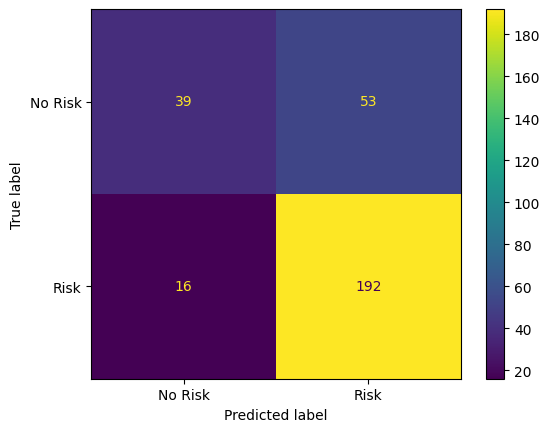

In [64]:
# Evaluation Metrics
# print confusion matrix with labels

ConfusionMatrixDisplay.from_predictions(df_test['Creditability'], df_test['will_risk'], display_labels = ['No Risk', 'Risk'])
# print accuracy
print('Accuracy:'+str(accuracy_score(df_test['Creditability'], df_test['will_risk'])))